In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(42)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/heigetvu/anaconda3/envs/test-env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/heigetvu/anaconda3/envs/test-env/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/heigetvu/anaconda3/envs/test-env/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/heigetvu/anaconda3/envs/test-env/lib/python3.10/site-packages/traitlets/config/applicat

In [2]:
batch_size = 1
seq_len = 3
embedding_dim = 3

input = torch.randint(high=2, size=(batch_size, seq_len, embedding_dim), dtype=torch.float32)
input

tensor([[[0., 1., 0.],
         [0., 0., 1.],
         [0., 0., 0.]]])

In [3]:
embedding_dim = 3
hidden_size = 2
activation = 'relu'
rnn_layer = nn.RNN(input_size=embedding_dim, hidden_size=hidden_size, nonlinearity=activation, batch_first=True)
# Whh = (2x2), Wxh = (2x3), bxh = (1x2), bhh = (1x2)
rnn_layer.weight_ih_l0.shape, rnn_layer.weight_hh_l0.shape, rnn_layer.bias_ih_l0, rnn_layer.bias_hh_l0

(torch.Size([2, 3]),
 torch.Size([2, 2]),
 Parameter containing:
 tensor([ 0.1802, -0.3258], requires_grad=True),
 Parameter containing:
 tensor([-0.0829, -0.2872], requires_grad=True))

In [4]:
rnn_layer.all_weights

[[Parameter containing:
  tensor([[-0.5188,  0.6146,  0.1323],
          [ 0.5224,  0.0958,  0.3410]], requires_grad=True),
  Parameter containing:
  tensor([[-0.0998,  0.5451],
          [ 0.1045, -0.3301]], requires_grad=True),
  Parameter containing:
  tensor([ 0.1802, -0.3258], requires_grad=True),
  Parameter containing:
  tensor([-0.0829, -0.2872], requires_grad=True)]]

TEST 1

In [5]:
h0 = torch.zeros(1, batch_size, hidden_size)  # Shape: (1, batch_size, hidden_size)

# Pass the input and properly shaped h0 to the RNN layer
output, hidden = rnn_layer(input, h0)
output

tensor([[[0.7119, 0.0000],
         [0.1586, 0.0000],
         [0.0815, 0.0000]]], grad_fn=<TransposeBackward1>)

TEST 2

In [6]:
h0 = torch.randint(
    high=2,
    size=(1, batch_size, hidden_size),
    dtype=torch.float32
)

In [7]:
h0

tensor([[[1., 1.]]])

In [8]:
output, hn = rnn_layer(input, h0)
output

tensor([[[1.1572, 0.0000],
         [0.1141, 0.0000],
         [0.0859, 0.0000]]], grad_fn=<TransposeBackward1>)

In [9]:
hn

tensor([[[0.0859, 0.0000]]], grad_fn=<StackBackward0>)

TEST 3

In [10]:
!pip install torchtext==0.17.2

In [11]:
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

In [12]:
data = ["dog bites man", "man bites man", "dog eats meat", "man eats food"]

# max vocab size
vocab_size = 7

# Define tokenizer func
tokenizer = get_tokenizer("basic_english")

# Create a function to yield list of tokens
def yield_tokens(examples):
    for text in examples:
        yield tokenizer(text)

In [13]:
# Create vocab
vocab = build_vocab_from_iterator(
    yield_tokens(data),
    max_tokens=vocab_size,
    specials=["<unk>"]
)

vocab.set_default_index(vocab["<unk>"])
vocab.get_stoi()

{'food': 5, 'eats': 4, 'dog': 3, 'bites': 2, 'meat': 6, 'man': 1, '<unk>': 0}

In [14]:
# Create input
input = torch.tensor(vocab(tokenizer("dog bites man")))
input

tensor([3, 2, 1])

In [15]:
input = input.unsqueeze(0)

In [16]:
input

tensor([[3, 2, 1]])

In [17]:
embedding = nn.Embedding(
    num_embeddings=vocab_size,
    embedding_dim=10
)

In [18]:
embedding.weight

Parameter containing:
tensor([[-6.8662e-01, -4.9336e-01,  2.4149e-01, -1.1109e+00,  9.1546e-02,
         -2.3169e+00, -2.1680e-01, -1.3847e+00, -3.9571e-01,  8.0341e-01],
        [-6.2160e-01, -5.9200e-01, -6.3074e-02, -8.2855e-01,  3.3090e-01,
         -1.5576e+00,  3.2110e-01,  1.5736e+00, -8.4547e-01,  1.3123e+00],
        [ 6.8716e-01, -1.0892e+00, -3.5529e-01, -9.1382e-01,  8.9627e-01,
          4.9905e-02,  2.2667e+00,  1.1790e+00, -4.3445e-01, -1.3864e+00],
        [-1.2862e+00, -1.4032e+00, -9.2239e-01,  1.8113e+00,  1.6056e-01,
          3.6725e-01,  1.7541e-01,  1.3852e+00, -4.4585e-01,  1.4451e+00],
        [ 7.0781e-01, -1.0759e+00,  5.3565e-01,  1.1754e+00,  5.6117e-01,
         -4.5275e-01, -7.7178e-01, -1.7219e-01,  2.3105e-01,  8.6540e-03],
        [-1.4229e-01,  1.9707e-01, -1.1441e+00,  3.3832e-01,  4.7466e-01,
         -2.5095e+00,  4.8800e-01,  7.8459e-01,  2.8647e-02,  6.4076e-01],
        [ 5.8325e-01,  1.0669e+00,  5.5263e-01, -1.8527e-01,  7.5276e-01,
          

In [19]:
embedded_input = embedding(input)
embedded_input

tensor([[[-1.2862, -1.4032, -0.9224,  1.8113,  0.1606,  0.3672,  0.1754,
           1.3852, -0.4459,  1.4451],
         [ 0.6872, -1.0892, -0.3553, -0.9138,  0.8963,  0.0499,  2.2667,
           1.1790, -0.4345, -1.3864],
         [-0.6216, -0.5920, -0.0631, -0.8286,  0.3309, -1.5576,  0.3211,
           1.5736, -0.8455,  1.3123]]], grad_fn=<EmbeddingBackward0>)

In [20]:
embedding_dim = 10
hidden_size = 5
activation = "relu"

rnn_layer = nn.RNN(
    input_size=embedding_dim,
    hidden_size=hidden_size,
    nonlinearity=activation,
    batch_first=True
)

In [21]:
output, hn = rnn_layer(embedded_input)

In [22]:
output.shape

torch.Size([1, 3, 5])

In [23]:
output[:, -1].shape

torch.Size([1, 5])

In [24]:
hn.shape

torch.Size([1, 1, 5])

TEXT CLASSIFICATION

In [25]:
import os
import pandas as pd

def load_data_from_path(folder_path):
    examples = []
    for label in os.listdir(folder_path):
        full_path = os.path.join(folder_path, label)
        for file_name in os.listdir(full_path):
            file_path = os.path.join(full_path, file_name)
            with open(file_path, "r", encoding="utf-8") as f:
                lines = f.readlines()
            sentence = " ".join(lines)
            if label == "neg":
                label = 0
            if label == "pos":
                label = 1
            data = {
                'sentence': sentence,
                'label': label
            }
            examples.append(data)
    return pd.DataFrame(examples)

In [26]:
folder_paths = {
    'train': './data/data_train/train',
    'valid': './data/data_train/test',
    'test': './data/data_test/test'
}

train_df = load_data_from_path(folder_paths['train'])
valid_df = load_data_from_path(folder_paths['valid'])
test_df = load_data_from_path(folder_paths['test'])

PREPROCESSING

In [27]:
!pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'langid' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'langid'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941216 sha256=accc57aabb0f5b2b507917de4c19e65c613447401ddd46487d68b40edb22a1d3
  Stored in directory: /home/heigetvu/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [28]:
from langid.langid import LanguageIdentifier, model

def identify_vn(df):
    identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
    not_vi_idx = set()
    THRESHOLD = 0.9
    for idx, row in df.iterrows():
        score = identifier.classify(row["sentence"])
        if score[0] != "vi" or (score[0] == "vi" and score[1] <= THRESHOLD):
            not_vi_idx.add(idx)
    vi_df = df[~df.index.isin(not_vi_idx)]
    not_vi_df = df[df.index.isin(not_vi_idx)]
    return vi_df, not_vi_df

In [29]:
train_df_vi, train_df_other = identify_vn(train_df)

In [30]:
import re
import string

def preprocess_text(text):
    # remove URLs https://www.
    url_pattern = re.compile(r'https?://\s+\wwww\.\s+')
    text = url_pattern.sub(r" ", text)

    # remove HTML Tags: <>
    html_pattern = re.compile(r'<[^<>]+>')
    text = html_pattern.sub(" ", text)

    # remove puncs and digits
    replace_chars = list(string.punctuation + string.digits)
    for char in replace_chars:
        text = text.replace(char, " ")

    # remove emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r" ", text)

    # normalize whitespace
    text = " ".join(text.split())

    # lowercasing
    text = text.lower()
    return text

In [31]:
train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]
valid_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in valid_df.iterrows()]
test_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in test_df.iterrows()]

/tmp/ipykernel_25751/1058621333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]


In [32]:
def yield_tokens(sentences, tokenizer):
    for sentence in sentences:
        yield tokenizer(sentence)

In [33]:
# word-based tokenizer
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer("basic_english")

In [34]:
# build vocabulary
from torchtext.vocab import build_vocab_from_iterator

vocab_size = 10000
vocabulary = build_vocab_from_iterator(
    yield_tokens(train_df_vi['preprocess_sentence'], tokenizer),
    max_tokens=vocab_size,
    specials=["<pad>", "<unk>"]
)
vocabulary.set_default_index(vocabulary["<unk>"])

In [35]:
from torchtext.data.functional import to_map_style_dataset

def prepare_dataset(df):
    # create iterator for dataset: (sentence, label)
    for index, row in df.iterrows():
        sentence = row['preprocess_sentence']
        encoded_sentence = vocabulary(tokenizer(sentence))
        label = row['label']
        yield encoded_sentence, label

train_dataset = prepare_dataset(train_df_vi)
train_dataset = to_map_style_dataset(train_dataset)

valid_dataset = prepare_dataset(valid_df)
valid_dataset = to_map_style_dataset(valid_dataset)

test_dataset = prepare_dataset(test_df)
test_dataset = to_map_style_dataset(test_dataset)

DATALOADER

In [36]:
import torch

seq_length = 50

def collate_batch(batch):
    # create inputs, offsets, labels for batch
    sentences, labels = list(zip(*batch))
    encoded_sentences = [
        sentence+([0]* (seq_length-len(sentence))) if len(sentence) < seq_length else sentence[:seq_length]
        for sentence in sentences
    ]

    encoded_sentences = torch.tensor(encoded_sentences, dtype=torch.int64)
    labels = torch.tensor(labels)

    return encoded_sentences, labels

In [37]:
from torch.utils.data import DataLoader

batch_size = 128

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_batch
)
valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collate_batch
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collate_batch
)

In [38]:
next(iter(train_dataloader))

(tensor([[ 549,   12,  203,  ...,   15,  153,    2],
         [  23,  588,  133,  ...,  217,   26,   60],
         [ 221,   12,   75,  ...,  339,   15,  221],
         ...,
         [   7,   43,  306,  ...,   57,    7,  296],
         [ 280,   15,  153,  ..., 1857,   37,   98],
         [ 126,  181,  167,  ...,  715, 1898,  111]]),
 tensor([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
         0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
         0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
         0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
         1, 0, 1, 1, 0, 1, 1, 1]))

In [39]:
len(train_dataloader)

233

In [40]:
encoded_sentences, labels = next(iter(train_dataloader))

In [41]:
encoded_sentences.shape

torch.Size([128, 50])

In [42]:
labels.shape

torch.Size([128])

UTILS

In [43]:
import time

def train_epoch(model, optimizer, criterion, train_dataloader, device, epoch=0, log_interval=50):
    model.train()
    total_acc, total_count = 0, 0
    losses = []
    start_time = time.time()

    for idx, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        predictions = model(inputs, device)

        # compute loss
        loss = criterion(predictions, labels)
        losses.append(loss.item())

        # backward
        loss.backward()
        optimizer.step()
        total_acc += (predictions.argmax(1) == labels).sum().item()
        total_count += labels.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print(
                "| epoch {:3d} | {:5d}/{:5d} batches "
                "| accuracy {:8.3f}".format(
                    epoch, idx, len(train_dataloader), total_acc / total_count
                )
            )
            total_acc, total_count = 0, 0
            start_time = time.time()

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

def evaluate_epoch(model, criterion, valid_dataloader, device):
    model.eval()
    total_acc, total_count = 0, 0
    losses = []

    with torch.no_grad():
        for idx, (inputs, labels) in enumerate(valid_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            predictions = model(inputs, device)

            loss = criterion(predictions, labels)
            losses.append(loss.item())

            total_acc += (predictions.argmax(1) == labels).sum().item()
            total_count += labels.size(0)

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

def train(model, model_name, save_model, optimizer, criterion, train_dataloader, valid_dataloader, num_epochs, device):
    train_accs, train_losses = [], []
    eval_accs, eval_losses = [], []
    best_loss_eval = 100
    times = []
    for epoch in range(1, num_epochs+1):
        epoch_start_time = time.time()
        # Training
        train_acc, train_loss = train_epoch(model, optimizer, criterion, train_dataloader, device, epoch)
        train_accs.append(train_acc)
        train_losses.append(train_loss)

        # Evaluation
        eval_acc, eval_loss = evaluate_epoch(model, criterion, valid_dataloader, device)
        eval_accs.append(eval_acc)
        eval_losses.append(eval_loss)

        # Save best model
        if eval_loss < best_loss_eval:
            torch.save(model.state_dict(), save_model + f'/{model_name}.pt')

        times.append(time.time() - epoch_start_time)
        # Print loss, acc end epoch
        print("-" * 59)
        print(
            "| End of epoch {:3d} | Time: {:5.2f}s | Train Accuracy {:8.3f} | Train Loss {:8.3f} "
            "| Valid Accuracy {:8.3f} | Valid Loss {:8.3f} ".format(
                epoch, time.time() - epoch_start_time, train_acc, train_loss, eval_acc, eval_loss
            )
        )
        print("-" * 59)

    # Load best model
    model.load_state_dict(torch.load(save_model + f'/{model_name}.pt', weights_only=True))
    model.eval()
    metrics = {
        'train_accuracy': train_accs,
        'train_loss': train_losses,
        'valid_accuracy': eval_accs,
        'valid_loss': eval_losses,
        'time': times
    }
    return model, metrics

import matplotlib.pyplot as plt

def plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses):
    epochs = list(range(num_epochs))
    fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
    axs[0].plot(epochs, train_accs, label = "Training")
    axs[0].plot(epochs, eval_accs, label = "Evaluation")
    axs[1].plot(epochs, train_losses, label = "Training")
    axs[1].plot(epochs, eval_losses, label = "Evaluation")
    axs[0].set_xlabel("Epochs")
    axs[1].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[1].set_ylabel("Loss")
    plt.legend()

MODELING

In [44]:
class RNNClassifier(nn.Module):
    def __init__(self, vocab_size=10000, embedding_dim=200, hidden_size=150, num_classes=2):
        super(RNNClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.embedding_dim = embedding_dim
        self.hidden_size = hidden_size
        self.vocab_size = vocab_size
        self.embedding_layer = nn.Embedding(
            num_embeddings=vocab_size,
            embedding_dim=embedding_dim,
        )
        self.rnn = nn.RNN(
            input_size=embedding_dim,
            hidden_size=hidden_size,
            batch_first=True
        )
        self.linear = nn.Linear(self.hidden_size, num_classes)

    def forward(self, x_batch, device):
        embeddings = self.embedding_layer(x_batch)
        output, last_hidden = self.rnn(
            embeddings, torch.randn(1, len(x_batch), self.hidden_size).to(device)
        )
        output = self.linear(output[:, -1])

        return output

In [45]:
model = RNNClassifier(vocab_size=10000, num_classes=2)

In [46]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [47]:
predictions = model(encoded_sentences.to(device), device)
predictions.shape

torch.Size([128, 2])

TRAINING

In [48]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RNNClassifier(vocab_size=10000, num_classes=2)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 50
save_model = './model'
os.makedirs(save_model, exist_ok = True)
model_name = 'model'

model, metrics = train(
    model, model_name, save_model, optimizer, criterion, train_dataloader, valid_dataloader, num_epochs, device
)

| epoch   1 |    50/  233 batches | accuracy    0.509
| epoch   1 |   100/  233 batches | accuracy    0.515
| epoch   1 |   150/  233 batches | accuracy    0.522
| epoch   1 |   200/  233 batches | accuracy    0.520
-----------------------------------------------------------
| End of epoch   1 | Time:  0.70s | Train Accuracy    0.533 | Train Loss    0.697 | Valid Accuracy    0.536 | Valid Loss    0.691 
-----------------------------------------------------------
| epoch   2 |    50/  233 batches | accuracy    0.545
| epoch   2 |   100/  233 batches | accuracy    0.550
| epoch   2 |   150/  233 batches | accuracy    0.552
| epoch   2 |   200/  233 batches | accuracy    0.567
-----------------------------------------------------------
| End of epoch   2 | Time:  0.62s | Train Accuracy    0.604 | Train Loss    0.676 | Valid Accuracy    0.637 | Valid Loss    0.637 
-----------------------------------------------------------
| epoch   3 |    50/  233 batches | accuracy    0.710
| epoch   3 

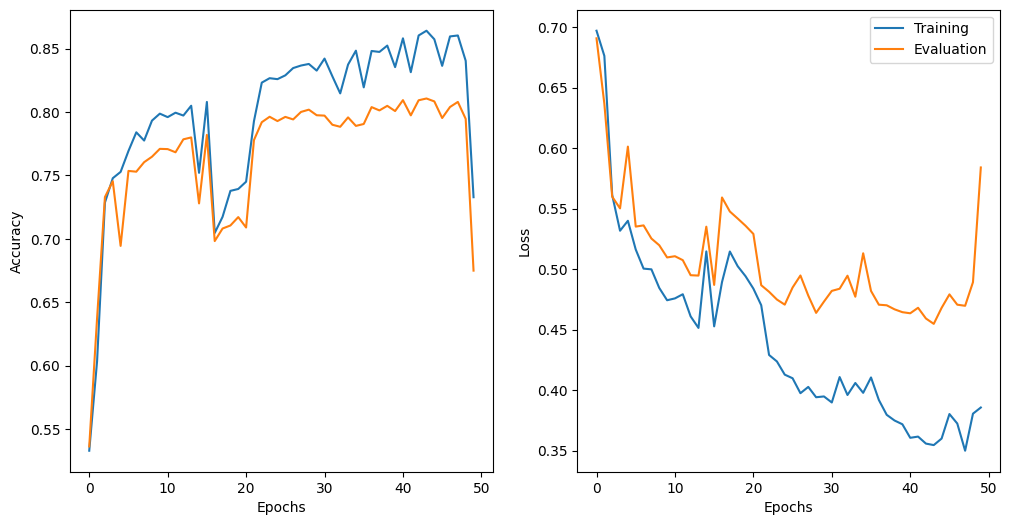

In [49]:
plot_result(
    num_epochs,
    metrics["train_accuracy"],
    metrics["valid_accuracy"],
    metrics["train_loss"],
    metrics["valid_loss"]
)

In [50]:
test_acc, test_loss = evaluate_epoch(model, criterion, test_dataloader, device)
test_acc, test_loss

(0.6772, 0.5823293369782122)

In [51]:
def inference(sentence, vocabulary, model, device):
    sentence = preprocess_text(sentence)
    encoded_sentence = vocabulary(tokenizer(sentence))
    encoded_sentence = torch.tensor([encoded_sentence])
    encoded_sentence = encoded_sentence.to(device)

    with torch.no_grad():
        predictions = model(encoded_sentence, device)
    preds = nn.Softmax(dim=1)(predictions)
    p_max, yhat = torch.max(preds.data, 1)

    return round(p_max.item(), 2)*100, yhat.item()

In [52]:
inference(sentence='quán ăn dở quá', vocabulary=vocabulary, model=model, device=device)

(80.0, 0)